## 课程论文

 请务必交到exer8文件夹下，**谢绝交到master下**
+ 请不要改动任何文件，拜托
+ 请于12月30日前先在github上提交
+ 请在元旦后提交纸质版，将本页面文件先打印为pdf格式，再去打印店付印
+ 请将论文模板和本页面文件一起装订，前者放上面，本页面文件放下面
+ 纸质版提交时间和地点请留意微信群通知

请写一下姓名和学号：
+ 姓名 0165241
+ 学号 黄德辉

### 样本均值分布的统计试验

+ 请将CEPS.csv数据读入python
+ 请从中随机抽取1000个数据
+ 请根据问卷从数据中挑选两个连续型变量（likert量表可以近似看作连续变量）
+ 计算这两个连续变量的均值
+ 重复随机抽取—计算均值这个过程30次，得到两个变量30个样本均值
+ 绘制这30个样本均值的直方图
+ 计算均值的均值和标准误

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [3]:
df = pd.read_csv("CEPS.csv", encoding='gb2312', na_values = " ") #不处理缺失值，无法计算均值

D:\Program\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**1. 变量选取数据处理：**选取了身高a13和体重a14两个变量

In [4]:
df1 = pd.DataFrame(df, columns=['a13', 'a14'])
df_mean = pd.DataFrame(index = ['a13', 'a14'])
for i in range(30):
    df_mean[i] = df1.sample(n=1000, random_state=None).mean()#使用sample方法随机抽取数据，并用mean方法算均值
df_mean = df_mean.T#样本均值的DataFrame

**2. 绘制柱状图**

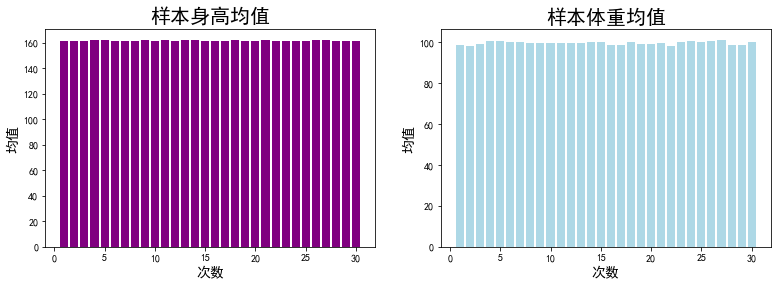

In [5]:
fig = plt.figure(figsize=(13,4))#定义一个长为12宽为4英寸的画布
ax1 = fig.add_subplot(121)#将画布分为1行2列，从左到右从上到下取第1块
#ax1.hist(df_mean.a13,facecolor='purple',edgecolor='black')
ax1.bar([i for i in range(1,31)],df_mean.a13,facecolor='purple')
ax1.set_xlabel('次数',fontsize=14)
ax1.set_ylabel('均值',fontsize=14)
ax1.set_title("样本身高均值",fontsize=20)
ax2 = fig.add_subplot(122)#将画布分为1行2列，从左到右从上到下取第2块
ax2.bar([i for i in range(1,31)],df_mean.a14,color='lightblue')
ax2.set_xlabel('次数',fontsize=14)
ax2.set_ylabel('均值',fontsize=14)
ax2.set_title("样本体重均值",fontsize=20)
plt.show()

**3. 计算均值的均值**

In [6]:
df1.mean()#总体均值

a13    161.611091
a14     99.592449
dtype: float64

In [7]:
df_mean.mean()#样本均值的均值

a13    161.652211
a14     99.744022
dtype: float64

**4. 计算均值标准误：**平均值的标准差 Standard Error of Mean

In [8]:
df_mean.std()#无偏（除的n-1）的均值标准误sem（Standard Error of Mean）

a13    0.261817
a14    0.765400
dtype: float64

### 回归分析

+ 请从CEPS.csv数据里挑选若干变量建立回归方程，要求至少三个自变量
    + 如，学生的学业成绩受认知水平、家庭收入的影响
    + 考虑因变量和自变量间的实质关系，变量间关系应该是有意义
    + 选择自变量时，注意变量的类型，如果是分类变量，需要进行编码
+ 请报告回归方程的结果，需要包括：
    + 模型拟合指标
    + 模型的显著性检验结果
    + 变量的系数
    + 各系数的显著性检验结果
    + 对模型结果的解释
    

**1. 变量选取**

> **研究问题：**七年级学生的好朋友个数和对未来的信心对每天晚上的睡觉时间有没有影响？

> **变   量：**C19你有几个最好的朋友？C25你对自己的未来有没有信心？B18你平均每天晚上睡多长时间？

>**关系假定：**睡眠会受到诸多因素的影响，尤其是一个人的心理状态，因此挑选了对未来的信心和好朋友个数这两个变量来描述样本中学生的心理状态，这两个自变量应当与睡眠时间有着正向的关系。

In [9]:
df2 = pd.DataFrame(df, columns=['c19', 'c25', 'b18a', 'b18b'])

In [10]:
df2.head()

,c19,c25,b18a,b18b
0,10.0,4.0,9.0,0.0
1,31.0,4.0,9.0,0.0
2,2.0,4.0,8.0,0.0
3,32.0,3.0,9.0,0.0
4,2.0,3.0,7.0,30.0


**2. 数据处理**

> **1> b18a和b18b的重定义：**将B18的数据进行调整，原数据中b18a存的是小时，b18b存的是分钟。为了统一口径，先将b18b的数据转化为小时变量b18c，再将b18a和b18c共同整合（加起来）为b18变量。

In [11]:
#df2.pop('b18c')#测试时删除b18c这一列的数据
df2.insert(4,'b18c',df2.b18b/60)#将b18b转化后添加到新生成的b18c中
#df2.pop('b18')#测试时删除b18这一列的数据
df2.insert(2,'b18',df2.b18a+df2.b18c)#将b18c和b18a求和后添加到新生成的b18中
df2.head()

,c19,c25,b18,b18a,b18b,b18c
0,10.0,4.0,9.0,9.0,0.0,0.0
1,31.0,4.0,9.0,9.0,0.0,0.0
2,2.0,4.0,8.0,8.0,0.0,0.0
3,32.0,3.0,9.0,9.0,0.0,0.0
4,2.0,3.0,7.5,7.0,30.0,0.5


> **2> 数据清洗：**
   + 从描述统计和直方图中可以看出，b18(睡眠时间)集中在5-15小时之间，存在着零小时及超过24小时的异常数据。因此根据生活经验和查阅资料，决定剔除这些异常数据，截取睡眠时间在(0-12)小时之间的数据。
   + 同时剔除含有缺失值的样本。
   + 从df2中取出b18,c19,c25三组数据

In [12]:
df2.describe()

,c19,c25,b18,b18a,b18b,b18c
count,18907.000000,19322.000000,18772.000000,19199.000000,18797.000000,18797.000000
mean,10.967631,3.211158,7.992587,7.797489,11.776826,0.196280
std,14.991969,0.720089,1.632974,1.636720,15.321265,0.255354
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,3.000000,7.000000,7.000000,0.000000,0.000000
50%,6.000000,3.000000,8.000000,8.000000,0.000000,0.000000
75%,10.000000,4.000000,9.000000,9.000000,30.000000,0.500000
max,99.000000,4.000000,41.333333,41.000000,59.000000,0.983333


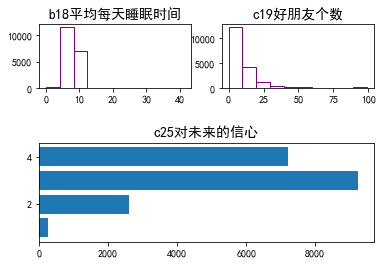

In [14]:
fig2 = plt.figure()
ax3 = fig2.add_subplot(321)
ax3.hist(df2.b18,facecolor='white',edgecolor='purple')
ax3.set_title("b18平均每天睡眠时间",fontsize=14)
ax4 = fig2.add_subplot(322)
ax4.hist(df2.c19,facecolor='white',edgecolor='purple')
ax4.set_title("c19好朋友个数",fontsize=14)
ax5 = fig2.add_subplot(212)
ax5.barh([i for i in range(1,5)],df2.c25.value_counts().sort_index())
ax5.set_title("c25对未来的信心",fontsize=14)
plt.show()

In [15]:
df3 = df2[['b18','c19','c25']][(df2.b18>0)&(df2.b18<12)].dropna(axis=0,how='any')
df3.head()

,b18,c19,c25
0,9.0,10.0,4.0
1,9.0,31.0,4.0
2,8.0,2.0,4.0
3,9.0,32.0,3.0
4,7.5,2.0,3.0


**3. 建立模型**

In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [17]:
model_x= ['c19','c25']
X = df3.loc[ :,model_x].values
y=df3['b18'].values
model = sm.OLS(y, X)
results = model.fit()
print(results.params)#系数
print(results.summary())#显示模型的详细结果

[0.01213674 2.31328086]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                 1.292e+05
Date:                Fri, 28 Dec 2018   Prob (F-statistic):               0.00
Time:                        10:38:49   Log-Likelihood:                -38331.
No. Observations:               17959   AIC:                         7.667e+04
Df Residuals:                   17957   BIC:                         7.668e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0121      0

**4. 结果分析**

> **1>模型拟合指标:**R-squared的值为0.935，大于0.9，表明模型的拟合效果好。

> **2>模型的显著性检验结果:**F值为2733，对应的p值接近0，可以在1%的显著性水平下认为模型是显著的。

> **3>变量的系数:**
>> **x1(c19好朋友个数)：**系数为*0.01213674*，其与因变量b18(平均每天睡眠时间)是正相关的，但是对因变量的影响较微弱。

>> **x2(c25对未来的信心)：**系数为*2.31328086*，对因变量(睡眠时间)有着较大的正向影响，即调查样本中的七年级学生对自己的未来越有信心，其睡眠时间就相对地越长。

> **4>各系数的显著性检验结果:**x1与x2的p值均接近于0，远小于显著水平0.01，即两个变量对因变量的解释效果是显著的。

> **5> 对模型结果的解释：**
>> 该模型说明七年级学生的好朋友个数和对未来的信心对其每天晚上的睡觉时间是有着积极的影响的。

>> 具体来说，七年级学生对自己的未来越有信心，其睡眠时间(在0-12小时的范围内)就会显著地变长；而相对来说，好朋友的个数对提升学生的睡眠时间有着积极的影响，但是效果却并不是很显著。

> **6> 建议：**青少年是祖国未来发展的重要支撑，青少年的身体健康是关乎国计民生的重大问题，而睡眠对青少年身体健康有着及其重要的影响。为了青少年的健康成长与我们整个国家未来的长远发展考虑，结合模型分析结果，我认为我们不必局限于过去的传统观点：通过减轻课业负担来提升青少年的睡眠质量。而是可以从青少年对未来的信心这点入手，平时多拓展学生们的娱乐生活，多接触社会散发出的正能量，积极的教育他们，让他们怀着积极向上的心态，对未来保持信心，以此间接地改善青少年的睡眠质量，增强青少年的体质。